<a href="https://colab.research.google.com/github/Praveen3ravi/Machine_Learning/blob/main/LogisticRegression_Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.patches as patches
import matplotlib.pyplot as plt
% matplotlib inline

# **Visualisation Setup**

In [ ]:
sns.set_context("talk")
sns.set_style("whitegrid", {'grid.color': '.92'})

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]


# **Visualising the data**

In [ ]:

yearly_incomes_us_dollars = [12000, 14000, 25000, 28000, 38000, 45000, 50000, 55000, 60000, 66000, 73000, 75000]
credit_card_decisions = ["denied"]*4 + ["approved"] + ["denied"]*2 + ["approved"]*5
application_data = {'yearly_income': yearly_incomes_us_dollars,
        'credit_card_decision': credit_card_decisions
        }
df_credit_card_applications = pd.DataFrame(application_data)
df_credit_card_applications

,yearly_income,credit_card_decision
0,12000,denied
1,14000,denied
2,25000,denied
3,28000,denied
4,38000,approved
5,45000,denied
6,50000,denied
7,55000,approved
8,60000,approved
9,66000,approved


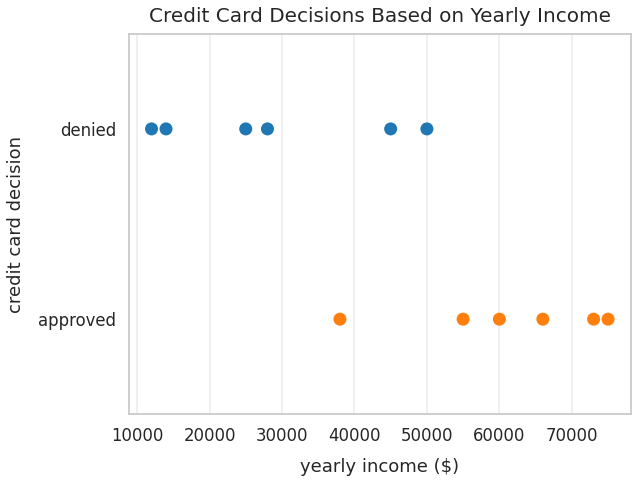

In [ ]:
plt.figure(figsize=(9,
                    7))
sns.stripplot(data=df_credit_card_applications, x="yearly_income", y="credit_card_decision", jitter=False, size=13)
plt.xlabel("yearly income ($)", labelpad=13)
plt.ylabel("credit card decision", labelpad=13)
plt.title("Credit Card Decisions Based on Yearly Income", y=1.015, fontsize=20)
ax = plt.gca()

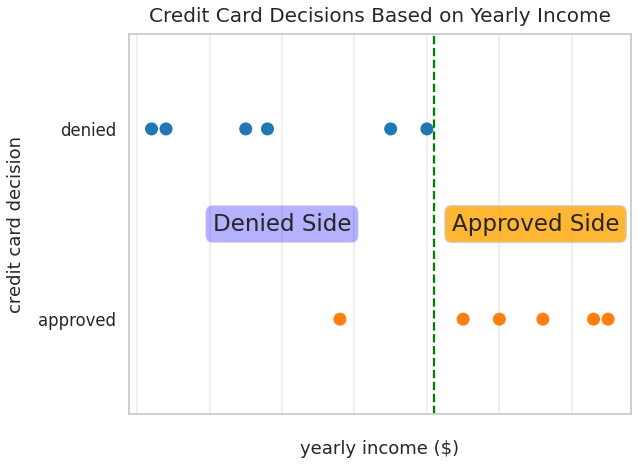

In [ ]:
plt.figure(figsize=(9, 7))
ax = sns.stripplot(data=df_credit_card_applications, x="yearly_income", y="credit_card_decision", jitter=False, size=13)
plt.xlabel("yearly income ($)", labelpad=13)
plt.ylabel("credit card decision", labelpad=13)
plt.title("Credit Card Decisions Based on Yearly Income", y=1.015, fontsize=20)
plt.axvline(x=51000, linestyle="--", color='green')
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
ax.text(65000, 0.5, "Approved Side", ha="center", va="center", size=23, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
ax.text(30000, 0.5, "Denied Side", ha="center", va="center", size=23, bbox=bbox_props_denied)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

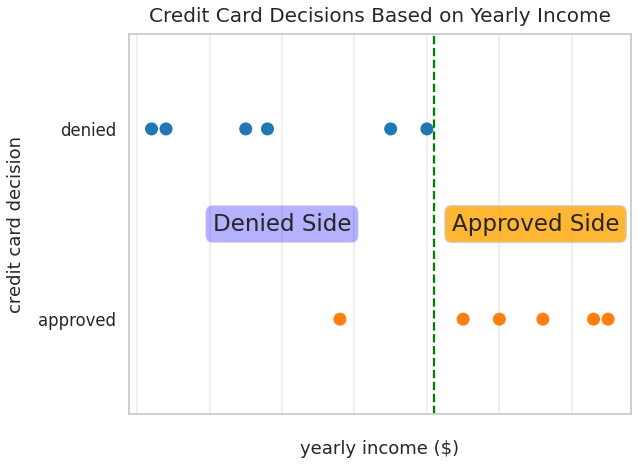

In [ ]:
plt.figure(figsize=(9, 7))
ax = sns.stripplot(data=df_credit_card_applications, x="yearly_income", y="credit_card_decision", jitter=False, size=13)
plt.xlabel("yearly income ($)", labelpad=13)
plt.ylabel("credit card decision", labelpad=13)
plt.title("Credit Card Decisions Based on Yearly Income", y=1.015, fontsize=20)
plt.axvline(x=51000, linestyle="--", color='green')
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
ax.text(65000, 0.5, "Approved Side", ha="center", va="center", size=23, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
ax.text(30000, 0.5, "Denied Side", ha="center", va="center", size=23, bbox=bbox_props_denied)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# **More data and visualisation**

In [ ]:
credit_scores = [580, 600, 620, 640, 680, 670, 650, 700, 690, 710, 680, 715]
application_data["credit_score"] = credit_scores
df_credit_card_applications = pd.DataFrame(application_data)

In [ ]:
df_credit_card_applications

,yearly_income,credit_card_decision,credit_score
0,12000,denied,580
1,14000,denied,600
2,25000,denied,620
3,28000,denied,640
4,38000,approved,680
5,45000,denied,670
6,50000,denied,650
7,55000,approved,700
8,60000,approved,690
9,66000,approved,710


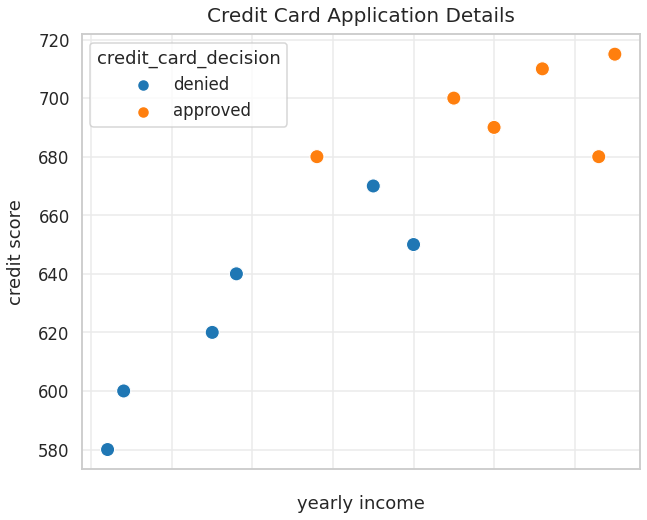

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='yearly_income', y='credit_score', hue='credit_card_decision', data=df_credit_card_applications, s=200)
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

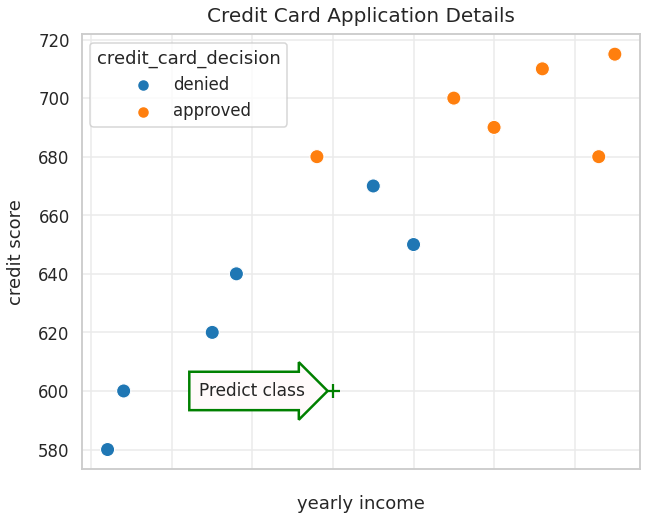

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='yearly_income', y='credit_score', hue='credit_card_decision', data=df_credit_card_applications, s=200)
plt.scatter([40000], [600], c='green', s=200, marker='+')
bbox_props = dict(boxstyle="rarrow, pad=0.6", fc="snow", ec="g", lw=2.5)
t = ax.text(30000, 600, "Predict class", ha="center", va="center", size=17, bbox=bbox_props)
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

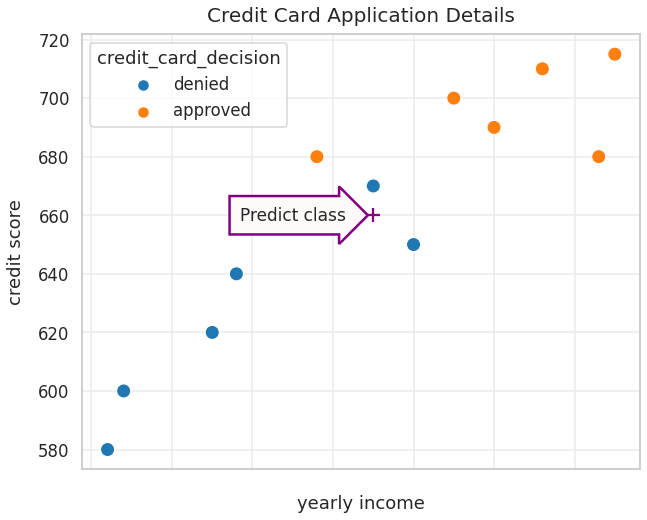

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='yearly_income', y='credit_score', hue='credit_card_decision', data=df_credit_card_applications, s=200)
plt.scatter([45000], [660], c='purple', s=200, marker='+')
bbox_props = dict(boxstyle="rarrow, pad=0.6", fc="snow", ec="purple", lw=2.5)
t = ax.text(35000, 660, "Predict class", ha="center", va="center", size=17, bbox=bbox_props)
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

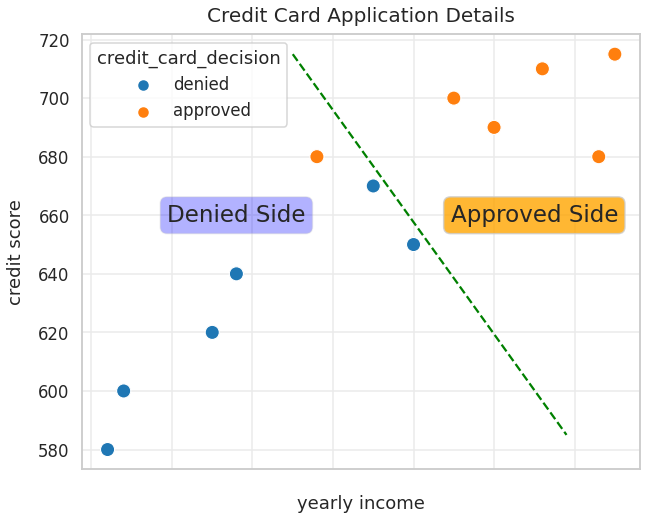

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='yearly_income', y='credit_score', hue='credit_card_decision', data=df_credit_card_applications, s=200)
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.8)
ax.text(65000, 660, "Approved Side", ha="center", va="center", size=23, bbox=bbox_props_approved)
bbox_props_denied = dict(boxstyle="round", fc="blue", ec="0.8", alpha=0.3)
ax.text(28000, 660, "Denied Side", ha="center", va="center", size=23, bbox=bbox_props_denied);
plt.plot([35000, 69000], [715, 585], linestyle="--", color='green')
plt.title("Credit Card Application Details", y=1.015, fontsize=20)
plt.xlabel("yearly income", labelpad=13)
plt.ylabel("credit score", labelpad=13)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));


# **Logistic Regression**

In [ ]:
x_values_for_sigmoid = np.linspace(-10, 10, 120)
x_values_for_sigmoid[0:5]

array([-10.        ,  -9.83193277,  -9.66386555,  -9.49579832,
        -9.32773109])

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

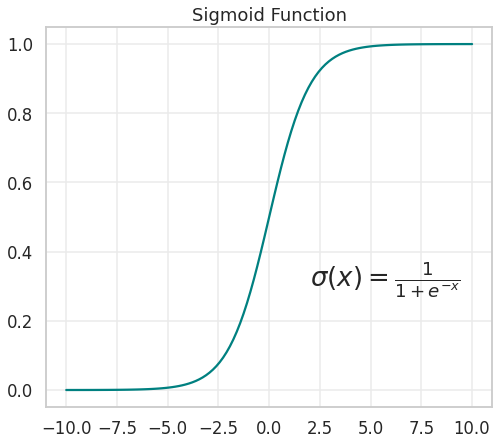

In [ ]:
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=26)
plt.show()

In [ ]:
1/(1+np.exp(-10))

0.9999546021312976

# More Data

In [ ]:
yearly_incomes_us_dollars = np.random.normal(loc=50000, scale=15000, size=500)
yearly_incomes_us_dollars = sorted(yearly_incomes_us_dollars)
credit_card_decisions = [0]*180 + [1]*4 + [0]*16 + [1]*5 + [0]*10 + [1]*(500-215)
application_data = {'yearly_income': yearly_incomes_us_dollars,
        'credit_card_decision': credit_card_decisions
        }
df_credit_card_applications2 = pd.DataFrame(application_data)
df_credit_card_applications2

,yearly_income,credit_card_decision
0,8313.696630,0
1,9870.409636,0
2,14259.676034,0
3,14648.809604,0
4,16018.446691,0
...,...,...
495,89168.589549,1
496,90014.852292,1
497,90041.193363,1
498,90746.730550,1


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_credit_card_applications2['yearly_income'].values.reshape(-1, 1)
y = df_credit_card_applications2['credit_card_decision'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
scaler.fit(X_train) # compute mu and sigma
X_train = scaler.transform(X_train)
# wrong - never call scaler fit on test again - scaler.fit(X_test)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


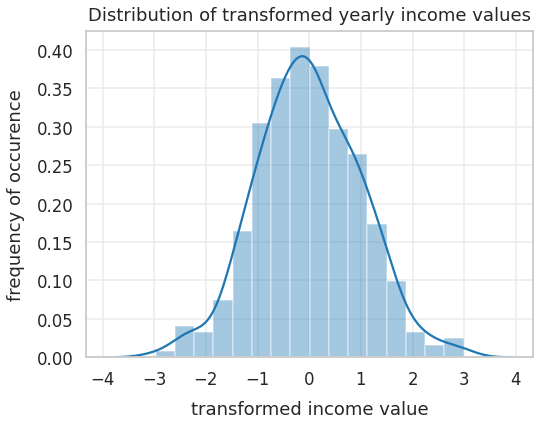

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(X_train)
plt.title("Distribution of transformed yearly income values", y=1.015)
plt.xlabel("transformed income value", labelpad=12)
plt.ylabel("frequency of occurence", labelpad=12);

# Fitting the model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_train, y_train) #training of data happens  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the model

In [ ]:
log_reg.predict_proba(X_train)[1], log_reg.predict(X_train)[1]

(array([0.00409373, 0.99590627]), 1)

In [ ]:
X_train_probability_class_1 = log_reg.predict_proba(X_train)[:, 1]
X_train_probability_class_1[0]

0.28081222531301264

In [ ]:
predictions = {"x_train_points": X_train.flatten(),
                 "x_train_probability_being_class_1": X_train_probability_class_1}
df_predictions = pd.DataFrame(predictions)
df_predictions

,x_train_points,x_train_probability_being_class_1
0,-0.470260,0.280812
1,0.676463,0.995906
2,-0.462773,0.289374
3,-0.660074,0.118622
4,0.652206,0.995312
...,...,...
320,-0.920825,0.030216
321,0.062188,0.885675
322,0.501108,0.989124
323,1.162432,0.999731


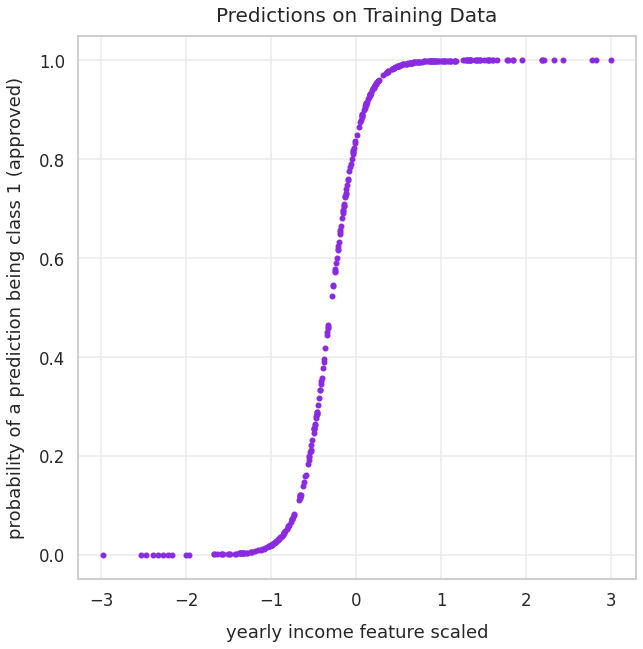

In [ ]:
ax = df_predictions.plot.scatter(x="x_train_points", y="x_train_probability_being_class_1", figsize=(10, 10), c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("yearly income feature scaled", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (approved)", labelpad=14);

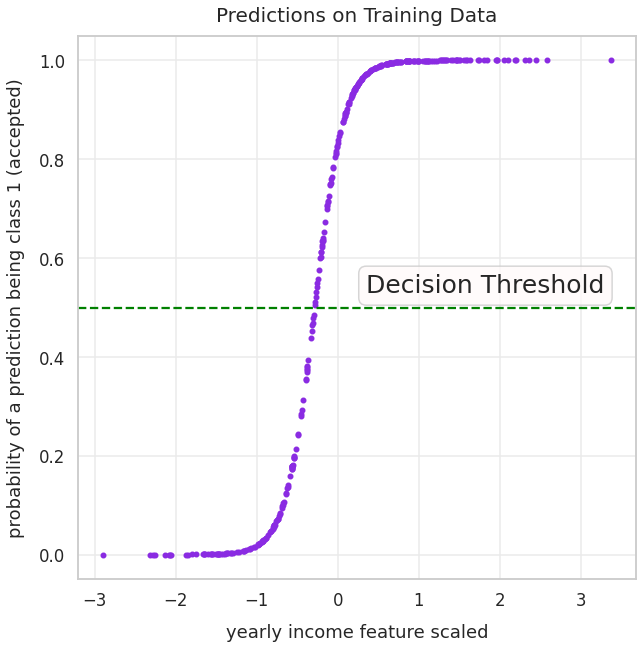

In [ ]:
ax = df_predictions.plot.scatter(x="x_train_points", y="x_train_probability_being_class_1", figsize=(10, 10), c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("yearly income feature scaled", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (accepted)", labelpad=14)
plt.axhline(y=0.5, linestyle="--", color='green')
bbox_props_decision_threshold = dict(boxstyle="round", fc="snow", ec="0.8", alpha=0.8)
ax.text(0.35, 0.53, "Decision Threshold", bbox=bbox_props_decision_threshold, size=25);

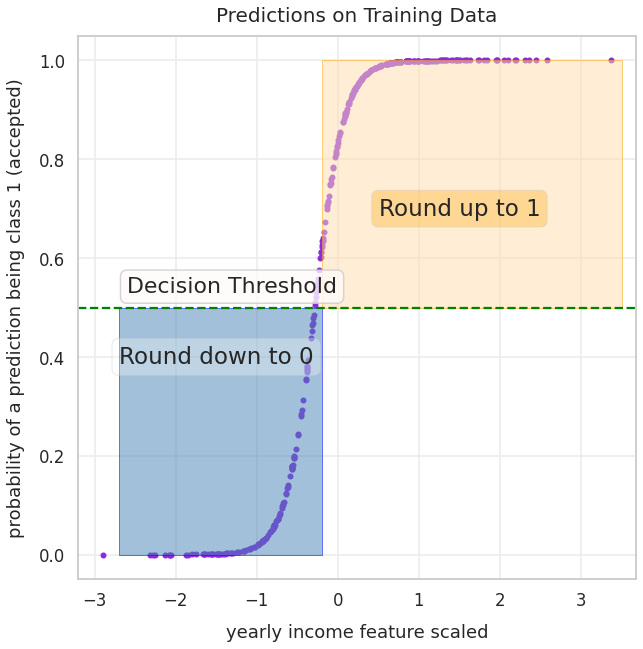

In [ ]:
ax = df_predictions.plot.scatter(x="x_train_points", y="x_train_probability_being_class_1", figsize=(10, 10), c='blueviolet')
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("yearly income feature scaled", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (accepted)", labelpad=14)
plt.axhline(y=0.5, linestyle="--", color='green')
bbox_props_decision_threshold = dict(boxstyle="round", fc="snow", ec="0.8", alpha=0.8)
ax.text(-2.60, 0.53, "Decision Threshold", bbox=bbox_props_decision_threshold, size=22);

orange_rect = patches.Rectangle((-0.2, 0.5), 3.7, 0.5, linewidth=1, edgecolor='orange', facecolor='navajowhite', alpha=0.5)
ax.add_patch(orange_rect)
bbox_props_approved = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.3)
ax.text(1.5, 0.7, "Round up to 1", ha="center", va="center", size=23, bbox=bbox_props_approved)

blue_rect = patches.Rectangle((-2.7, 0), 2.5, 0.5, linewidth=1, edgecolor='blue', facecolor='steelblue', alpha=0.5)
ax.add_patch(blue_rect)
bbox_props_denied = dict(boxstyle="round", fc="white", ec="0.8", alpha=0.3)
ax.text(-1.5, 0.4, "Round down to 0", ha="center", va="center", size=23, bbox=bbox_props_denied);

# Visualising the predictions

In [ ]:
log_reg.coef_ ## coeff - beta_1

array([[5.61132016]])

In [ ]:
log_reg.intercept_ ## intercept - beta_0

array([1.69834327])

In [ ]:
def log_reg_model_credit_card_applications_predict(yearly_income):
    return 1 / (1 + np.exp(-(log_reg.intercept_ + log_reg.coef_ * yearly_income)))

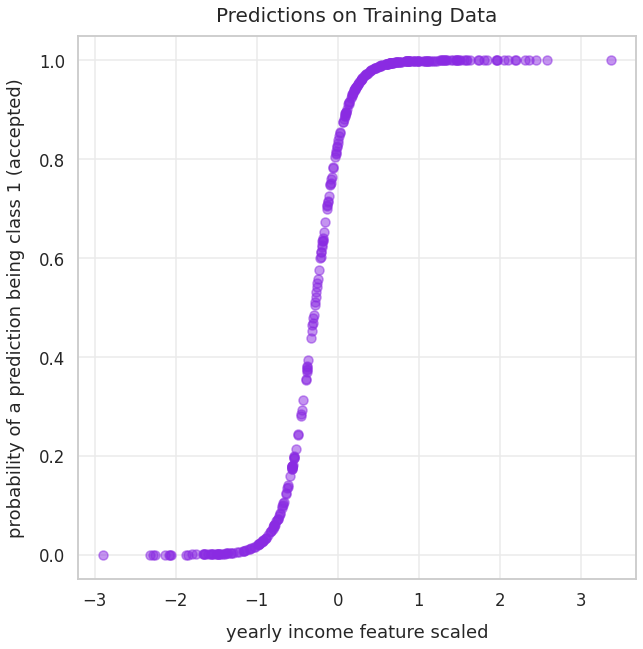

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x=X_train, y=log_reg_model_credit_card_applications_predict(X_train), c='blueviolet', alpha=0.5)
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("yearly income feature scaled", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (accepted)", labelpad=14);

# Classification Metrics

In [ ]:
accuracy_test_set = log_reg.score(X_test, y_test)
accuracy_test_set

0.9714285714285714

In [ ]:
print("{0:.2f}".format(round(accuracy_test_set, 2)))

0.97


# Confusion Matrix

In [ ]:
y_test_predictions = log_reg.predict(X_test)
y_test_predictions

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
class_names = ["denied", "approved"]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
cnf_matrix
# np.set_printoptions(precision=2);

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(7, 7))
# plt.grid(False)
# plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

array([[75,  3],
       [ 2, 95]])

# Evaluation Metrics

Precision: for our predictions of the positive class (approved in our example), how often is it correct?

The equation is:

Precision = True Positives / (True Positives + False Positives)

We can manually calculcate precision given the values in the confusion matrix above.

Precision = 93 / (93+3) = 0.96875



In [ ]:
print("Precision: {0}".format(precision_score(y_test, y_test_predictions)))

Precision: 0.9693877551020408


Recall: when the actual label is positive (approved in our example), how often did we predict correctly?

The equation is:

Recall = True Positives / (True Positives + False Negatives)

We can manually calculate recall given the values in the confusion matrix above.

Recall = 93 / (93 + 4) = 0.96

In [ ]:
print("Recall:", round(recall_score(y_test, y_test_predictions), 2))

Recall: 0.98


# **AUC - ROC**

In [ ]:
y_test

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

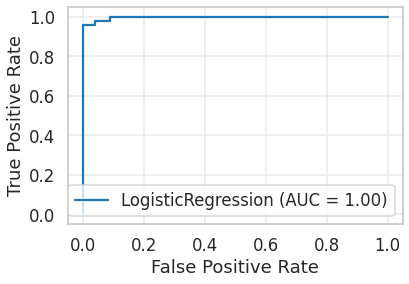

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_test_predictions)
f1_score(y_test,y_test_predictions)
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions, pos_label=2)
plot_roc_curve(log_reg, X_test, y_test)

In [ ]:
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

0.9973565952947396